In [1]:
import pickle
import json
import re
from urllib.request import urlopen
from bs4 import BeautifulSoup
import signal
from urllib.parse import urlparse
import uuid
import csv
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt


### Data figures and statistics for the paper

In [7]:
valid_urls = pickle.load(open('../data_2017-09/valid_urls.pkl', 'rb'))
url_file_map = pickle.load(open('../data_2017-09/url_file_map.pkl', 'rb'))

In [8]:
all_success = {url: url_file_map[url] for url in url_file_map if url_file_map[url]['status'] == 'success'}

In [9]:
print('Unique URLs in data set: ', len(all_success))
train = 0; val = 0; test = 0
train_q = 0; val_q = 0; test_q = 0
for url in all_success:
    if all_success[url]['split'] == 'train':
        train += 1
        train_q += len(all_success[url]['chains'])
    elif all_success[url]['split'] == 'val':
        val += 1
        val_q += len(all_success[url]['chains'])
    else:
        test += 1
        test_q += len(all_success[url]['chains'])

print('Train: ', train)
print('Val: ', val)
print('Test: ', test)
print('Total queries in data set: ', train_q + val_q + test_q)
print('Train queries: ', train_q)
print('Val queries: ', val_q)
print('Test queries: ', test_q)

Unique URLs in data set:  98231
Train:  78637
Val:  9849
Test:  9745
Total queries in data set:  158997
Train queries:  128404
Val queries:  15344
Test queries:  15249


In [14]:
all_domains = {}
for url in all_success:
    domain = urlparse(url).netloc
    if domain not in all_domains:
        all_domains[domain] = 0
    all_domains[domain] += 1
sorted_domains = sorted([(x, all_domains[x]) for x in all_domains], reverse=True, key=lambda x: x[1])
print(sorted_domains)

[('en.wikipedia.org', 63656), ('www.theguardian.com', 4935), ('www.forbes.com', 2414), ('www.businessinsider.com', 2039), ('www.cnn.com', 2031), ('www.npr.org', 1965), ('www.dailymail.co.uk', 1866), ('www.telegraph.co.uk', 1834), ('www.independent.co.uk', 1640), ('www.huffingtonpost.com', 1616), ('www.espn.com', 1486), ('www.theatlantic.com', 1448), ('www.bbc.com', 1438), ('www.bbc.co.uk', 1136), ('www.usatoday.com', 1089), ('www.politico.com', 943), ('www.latimes.com', 908), ('www.slate.com', 855), ('www.nbcnews.com', 784), ('abcnews.go.com', 720), ('www.wired.com', 587), ('www.pbs.org', 577), ('www.investopedia.com', 577), ('www.vox.com', 541), ('www.theonion.com', 382), ('www.foxnews.com', 358), ('www.thesun.co.uk', 256), ('www.cnbc.com', 103), ('insider.foxnews.com', 36), ('www.chicagotribune.com', 11)]


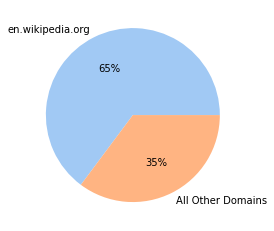

In [15]:
wiki_other_data = [sorted_domains[0][1], sum(x[1] for x in sorted_domains[1:])]
wiki_other_labels = ['en.wikipedia.org', 'All Other Domains']
colors = sb.color_palette('pastel')[:3]
plt.pie(wiki_other_data, labels=wiki_other_labels, colors=colors, autopct='%.0f%%')
plt.show()

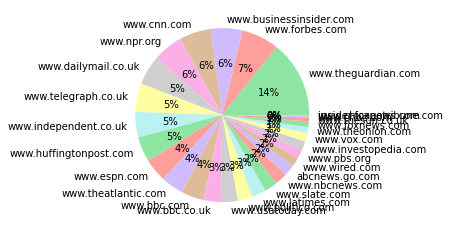

In [16]:
data = [x[1] for x in sorted_domains[1:]]
labels = [x[0] for x in sorted_domains[1:]]
colors = sb.color_palette('pastel')[2:34]
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%')
plt.show()

In [75]:
valid_domains = {'en.wikipedia.org': True, 'en.m.wikipedia.org': True, 'www.washingtonpost.com': True, 'www.theguardian.com': True, 'www.independent.co.uk': True,
            'www.theatlantic.com': True, 'www.bbc.com': True, 'www.nbcnews.com': True, 'www.usatoday.com': True, 'www.cnn.com': True, 'insider.foxnews.com': True,
            'www.npr.org': True, 'www.espn.com': True, 'www.politico.com': True, 'www.bbc.co.uk': True, 'www.telegraph.co.uk': True, 'www.businessinsider.com': True,
            'www.bloomberg.com': True, 'www.bbc.co.uk': True, 'www.forbes.com': True, 'abcnews.go.com': True, 'www.huffingtonpost.com': True, 'www.latimes.com': True,
            'www.pbs.org': True, 'www.thesun.co.uk': True, 'www.chicagotribune.com': True, 'www.dailymail.co.uk': True, 'www.cnbc.com': True, 'www.foxnews.com': True,
            'www.slate.com': True, 'www.wired.com': True, 'www.investopedia.com': True, 'www.theonion.com': True, 'www.vox.com': True, 'articles.chicagotribune.com': True}
print(len(sorted_domains))

33


In [17]:
for x,y in zip(sorted_domains[:16], sorted_domains[16:]):
    print(x[0] + ' & ' + str(x[1]) + ' & ' + y[0] + ' & ' + str(y[1]) + ' \\\\')

en.wikipedia.org & 63656 & www.latimes.com & 908 \\
www.theguardian.com & 4935 & www.slate.com & 855 \\
www.forbes.com & 2414 & www.nbcnews.com & 784 \\
www.businessinsider.com & 2039 & abcnews.go.com & 720 \\
www.cnn.com & 2031 & www.wired.com & 587 \\
www.npr.org & 1965 & www.pbs.org & 577 \\
www.dailymail.co.uk & 1866 & www.investopedia.com & 577 \\
www.telegraph.co.uk & 1834 & www.vox.com & 541 \\
www.independent.co.uk & 1640 & www.theonion.com & 382 \\
www.huffingtonpost.com & 1616 & www.foxnews.com & 358 \\
www.espn.com & 1486 & www.thesun.co.uk & 256 \\
www.theatlantic.com & 1448 & www.cnbc.com & 103 \\
www.bbc.com & 1438 & insider.foxnews.com & 36 \\
www.bbc.co.uk & 1136 & www.chicagotribune.com & 11 \\


In [24]:
relevance_scores = {}
with open('../data_2017-09/queries/relevance_scores.txt', 'r') as f:
    for line in f:
        split_line = line.split()
        relevance_scores[split_line[0]] = split_line[2]

queries = []
with open('../data_2017-09/queries/queries_train.tsv', 'r') as f:
    for i,line in enumerate(f):
        split_line = line.split('\t')
        query = " ".join(split_line[1:])
        queries.append(query)
with open('../data_2017-09/queries/queries_val.tsv', 'r') as f:
    for i,line in enumerate(f):
        split_line = line.split('\t')
        query = " ".join(split_line[1:])
        queries.append(query)
with open('../data_2017-09/queries/queries_test.tsv', 'r') as f:
    for i,line in enumerate(f):
        split_line = line.split('\t')
        query = " ".join(split_line[1:])
        queries.append(query)


In [25]:
def reject_outliers(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

Total comments (may be dups):  819600


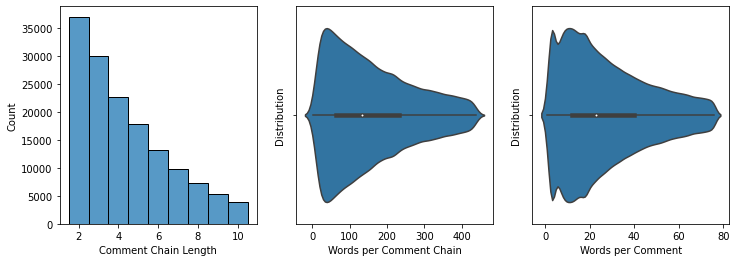

In [26]:
total_comments = 0
chain_lengths = []
char_lengths = []
comment_lengths = []
for query in queries:
    char_lengths.append(len(query.split(' ')))
    comment_lengths += [len(x.split(' ')) for x in query.split('<C>')]
    num_com = len(query.split('<C>'))
    total_comments += num_com
    if num_com < 11:
        chain_lengths.append(num_com)
chain_lengths = np.array(chain_lengths)
char_lengths = np.array(char_lengths)
comment_lengths = np.array(comment_lengths)

char_lengths_trimmed = reject_outliers(char_lengths)
comment_lengths_trimmed = reject_outliers(comment_lengths)

plt.rcParams['figure.figsize'] = [12,4]

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)

sb.histplot(x = chain_lengths, ax=ax1, discrete=True)
ax1.set_xlabel('Comment Chain Length')

sb.violinplot(x = char_lengths_trimmed, ax=ax2)
ax2.set_xlabel('Words per Comment Chain')
ax2.set_ylabel('Distribution')


p = sb.violinplot(x = comment_lengths_trimmed, ax=ax3)
ax3.set_xlabel('Words per Comment')
ax3.set_ylabel('Distribution')


fig.savefig('../out/plots/plot.pdf')
print('Total comments (may be dups): ', total_comments)

In [27]:
# code for checking if filenames are consistent with relevance scores

import os
all_file_ids = {x: True for x in list(relevance_scores.values())}
all_current_files = {x[:-5]: True for x in os.listdir('../data_2017-09/webpages')}
for file in all_file_ids:
    if file not in all_current_files:
        #os.remove('../data_2017-09/webpages/' + name + '.json')
        print(file)

### Files that got past the filters

In [13]:
import os
import json
file_lengths = []
for i,file in enumerate(os.listdir('../data_2017-09/webpages/')):
    webpage = json.load(open('../data_2017-09/webpages/' + file, 'r'))
    file_lengths.append((file, len(webpage['contents']), webpage['contents'][:1000]))
    if i % 10000 == 0: print(i)
sorted_fl = sorted(file_lengths, key=lambda x: x[1])

0
10000
20000
30000
40000
50000
60000
70000
80000
90000


In [10]:
file_url_map = {}
for url in url_file_map:
    if url_file_map[url]['status'] == 'success':
        file_url_map[url_file_map[url]['filename']] = url

In [4]:
# removing bloomberg
for url in url_file_map:
    if 'www.bloomberg.com' in url:
        if url_file_map[url]['status'] == "success":
            url_file_map[url]['status'] = 'failure-rate_limit'
            os.remove('../data_2017-09/webpages/' + url_file_map[url]['filename'] + '.json')

all_success = {url: url_file_map[url] for url in url_file_map if url_file_map[url]['status'] == 'success'}
print(len(url_file_map))
pickle.dump(url_file_map, open('../data_2017-09/url_file_map.pkl', 'wb'))

120324
